Nome:

RA:

Curso:



# Ex03 - Transformações de Intensidade (operações radiométricas)

Esta atividade tem 2 objetivos principais: 
  - Entender o que são transformações radiométricas e como podem ser implementadas
  - Explorar duas aplicações para as transformações radiométricas: normalização e segmentação. 

In [2]:
# Importando as bibliotecas que serão utilizadas
from PIL import Image
import numpy as np
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import os

# Definindo o nome da pasta compartilhada
# IMPORTANTE: substitua "NOME_DA_PASTA_COMPARTILHADA" abaixo pelo nome correspondente
pasta_compartilhada = "NOME_DA_PASTA_COMPARTILHADA"

In [ ]:
# Conexão do colab com o drive
from google.colab import drive 
drive.mount('/content/gdrive')
path = f"gdrive/MyDrive/{pasta_compartilhada}/Dados/Ex03/"

Mounted at /content/gdrive


## Parte 1 - Manipulando imagens

O código abaixo lê a imagem *flower.pgm* que está armazenada na pasta **Dados/Ex03** utilizando a biblioteca PIL/pillow, apresenta a imagem na tela e a transforma num array numpy.

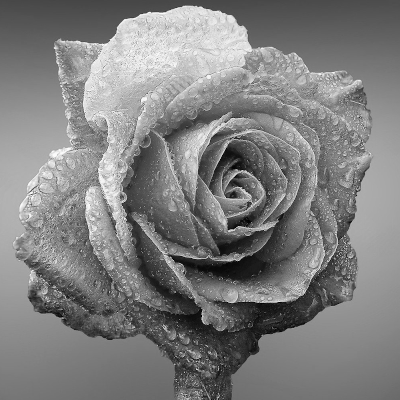

[[ 72  72  72 ...  78  77  77]
 [ 73  72  73 ...  78  78  78]
 [ 73  73  74 ...  78  78  79]
 ...
 [118 117 116 ... 107 107 106]
 [116 115 115 ... 106 106 106]
 [116 116 115 ... 106 106 106]]


In [3]:
img_file = f"{path}flower.pgm"
img = Image.open(img_file)
display(img)

# Convertendo para um array do numpy
f=np.asarray(img)
print(f)

É bastante útil poder transformar Images em PIL em arrays numpy, e vice-versa. Isso permitirá que realizemos operações matriciais nas imagens e posteriormente possamos visualizar (e salvar em arquivos) as imagens processadas. 

### Exercício 1.1 

**a)** Classifique a imagem como monocromática (binária, grayscale) ou multibanda (tentando identificar o padrão multibanda adotado). Descubra: qual a profundidade da imagem? Qual o maior e o menor valor de intensidade de pixel da imagem?


In [ ]:
# Insira seu código aqui

**b)** Leia a imagem *flower.pgm*, mostre na tela e transforme em um array numpy utilizando a biblioteca matplotlib.image. Exercite também o uso da barra de cores (colorbar).

Referência: [Tutorial Image Matplotlib](https://matplotlib.org/3.5.0/tutorials/introductory/images.html) 

In [ ]:
# Insira seu código aqui

**c)** Usando atributos do tipo [`Image`](https://pillow.readthedocs.io/en/stable/reference/Image.html#image-attributes) da biblioteca `PIL`, tente responder as mesmas perguntas do item **a)**.

In [ ]:
# Insira seu código aqui

### Exercício 1.2

Imagine que a imagem está um pouco clara demais e decido escurecê-la um pouco. Minha primeira ideia seria subtrair um valor de cada pixel, uma vez que valores menores correspondem a cores mais escuras. 

[[235 235 235 ... 241 240 240]
 [236 235 236 ... 241 241 241]
 [236 236 237 ... 241 241 242]
 ...
 [ 25  24  23 ...  14  14  13]
 [ 23  22  22 ...  13  13  13]
 [ 23  23  22 ...  13  13  13]]


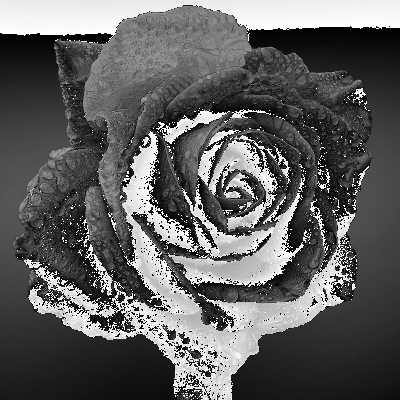

In [4]:
# Vou escurecer a imagem, subtraindo um valor dos pixels do array f.
g=f-93 
print(g)
# Agora vou transformar o array numa imagem PIL
g_img=Image.fromarray(g)
# E visualizar o resultado usando a função do PIL display
display(g_img)

**a)** Porque a imagem ficou mais clara ao invés de mais escura? Explique porque ao subtrair um determinado valor de intensidade da imagem original algumas regiões da imagem ficaram saturadas em branco.

*RESPOSTA:*

---
A principal mensagem é que podemos realizar operações quaisquer com os valores de pixel mas, no fim do dia, caso queiramos visualizar essas imagens, temos que pensar como esses valores serão mapeados para uma codificação que faça sentido no seu sistema computacional de apresentação.


**b)** Tente refazer esta mesma operação de "escurecimento" da imagem através de subtração, sem que esse efeito de saturação aconteça. Comente os métodos utilizados.

In [ ]:
# Insira seu código aqui

## Parte 2 - Transformação de Intensidade

Tranformações de intensidade ou transformações rediométricas alteram o valor do pixel aplicando-se uma função ou tabela de mapeamento. Para entender como isso é implementado na prática, estudem atentamente o tutorial sobre ["Transformações de intensidade"](https://github.com/lrittner/Computacao-Visual/blob/master/tutoriais/tutorial_ti_2.ipynb).

[[ 72  72  72 ...  78  77  77]
 [ 73  72  73 ...  78  78  78]
 [ 73  73  74 ...  78  78  79]
 ...
 [118 117 116 ... 107 107 106]
 [116 115 115 ... 106 106 106]
 [116 116 115 ... 106 106 106]]


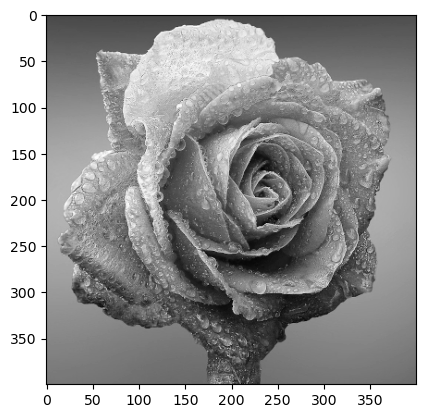

In [5]:
print(f)
plt.imshow(f,cmap='gray')

Vamos exercitar a aplicação de um mapeamento f = T[f] a partir de uma função de transformação T. No nosso caso, a função T será o negativo da imagem.

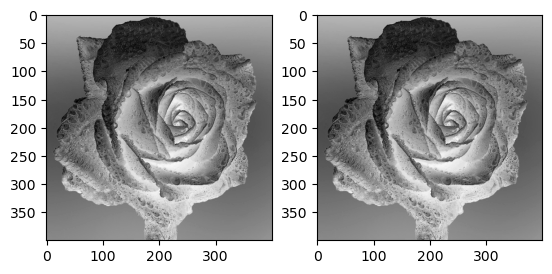

In [6]:
T = np.arange(256).astype('uint8')        # função identidade
T1 = 255 - T                              # criando a função negação a partir da identidade
#print(T1)
T2 = np.arange(255,-1,-1).astype('uint8') # criando diretamente a função negação
#print(T2)

plt.subplot(1,2,1)
f1 = T1[f]
plt.imshow(f1,cmap='gray')
plt.subplot(1,2,2)
f2 = T2[f]
plt.imshow(f2,cmap='gray')


### Exercício 2.1

Utilize transformações radiométricas para transformar a imagem e identificar o número da placa do carro apresentado na imagem abaixo. Explique seu raciocínio para chegar na solução.

float32


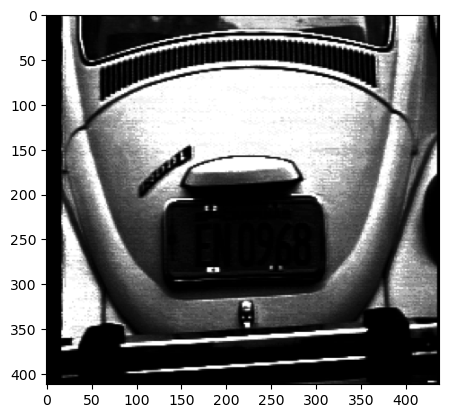

In [7]:
f = mpimg.imread(path+'fusca.png')  
plt.imshow(f,cmap='gray')
print(f.dtype)

In [ ]:
# Insira seu código aqui

### Exercício 2.2

Uma das possíveis aplicações das transformações radiométricas é a segmentação de imagens, onde destacamos um objeto de interesse dos demais objetos (ou do fundo). 

**a)** A imagem abaixo mostra duas bolachas. Escolha um valor de limiar (threshold) para separar a bolacha do fundo da imagem. Crie uma função de transformação T e aplique esta transformação para obter os objetos de interesse (bolachas) pintados de branco e o fundo em preto. Comente os métodos utilizados.

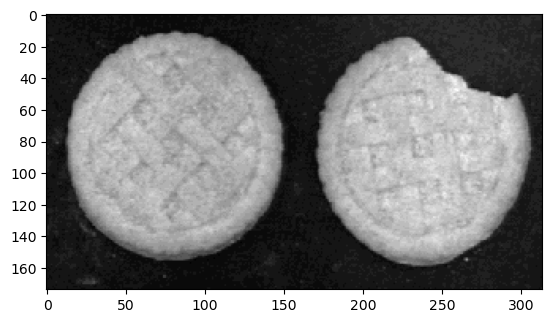

In [8]:
plt.subplot(111)  
f = mpimg.imread(path+"cookies.pgm")  
plt.imshow(f,cmap='gray')

In [ ]:
# Insira seu código aqui

### Exercício 2.3 

Leia e apresente a imagem `orquideafeec-calua.jpeg`. Execute processamentos de intensidade nas diferentes bandas da imagem (R, G, B). Comente os métodos utilizados e resultados obtidos. É possível segmentar a flor da orquídea usando uma única banda de cor?

Dica: exemplos disponíveis em [Applying point transforms e Processing individual bands](https://pillow.readthedocs.io/en/stable/handbook/tutorial.html#image-enhancement).

In [ ]:
# Insira seu código aqui

## Parte 3 - Contando moedas em uma imagem (opicional para EA979)

Observe atentamente e tente entender os códigos abaixo, que aplicam diversas funções e conceitos para obter o valor total de um conjunto de moedas (de 5, 10 ou 25 centavos) presentes em uma imagem. De maneira geral, foram utilizadas funções de limiarização, obtenção de componentes conexos e morfologia matemática.

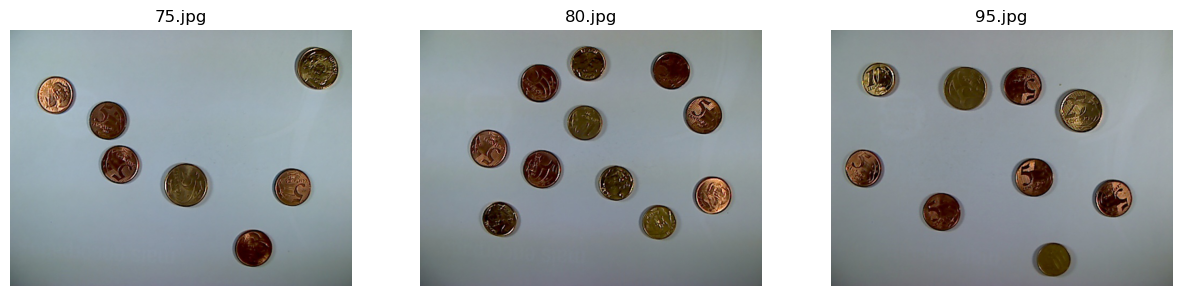

In [10]:
fig, axs = plt.subplots(1,3,figsize=(15, 6))

path_moedas = path+'Moedas/'

list_files = os.listdir(path_moedas)
for i, file in enumerate(list_files):
  plt.subplot(1,3,1+i)
  plt.axis('off')
  plt.title(file)
  img = mpimg.imread(path_moedas+file)
  plt.imshow(img)

In [11]:
import cv2

def seg_and_postprocessing(img, k_cl, k_op):
    binr = cv2.threshold(255 - img, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)[1]

    kernel_cl = np.ones((k_cl, k_cl), np.uint8) 
    kernel_op = np.ones((k_op, k_op), np.uint8) 
    
    close = cv2.morphologyEx(binr, cv2.MORPH_CLOSE, kernel_cl, iterations=1) 
    open = cv2.morphologyEx(close, cv2.MORPH_OPEN, kernel_op, iterations=1)

    plt.figure(figsize=(12,6))
    plt.subplot(1,3,1)
    plt.imshow(binr, cmap='gray')
    plt.axis('off')
    plt.subplot(1,3,2)
    plt.imshow(close, cmap='gray')
    plt.axis('off')
    plt.subplot(1,3,3)
    plt.imshow(open, cmap='gray')
    plt.axis('off')
    plt.show()

    return open

In [12]:
def calc_npixels_label(img, n_labels):
    list_npixels = []
    for v in range(n_labels-1):
        npixels = (img[img == v+1]//(v+1)).sum()
        list_npixels.append(npixels)
    return list_npixels

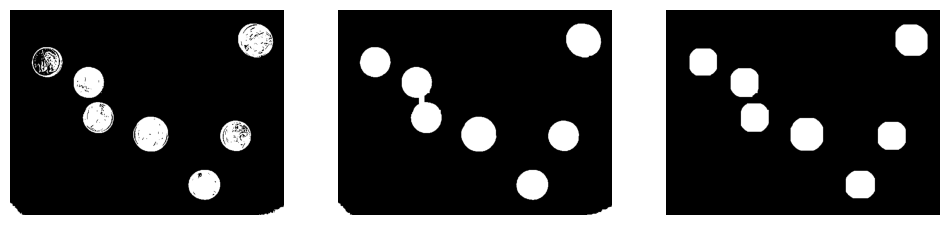

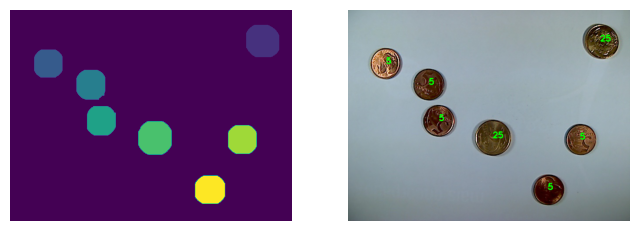

Imagem 75.jpg
Número de moedas 7
[4805, 3637, 3867, 3821, 5016, 3768, 3862]
Valor total: 75



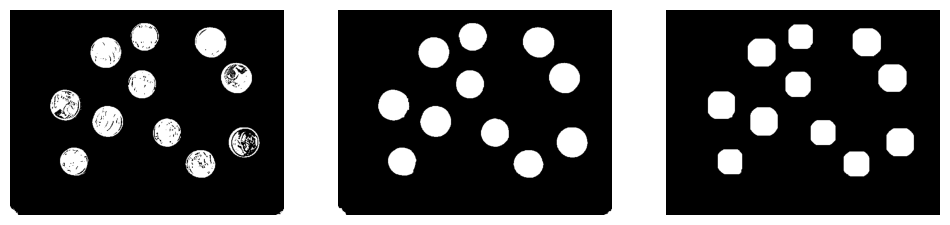

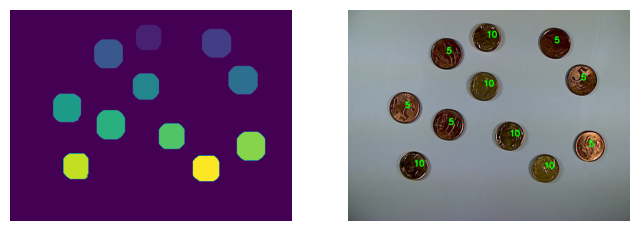

Imagem 80.jpg
Número de moedas 11
[2978, 3792, 3776, 3737, 3130, 3669, 3777, 3064, 3726, 3051, 3181]
Valor total: 80



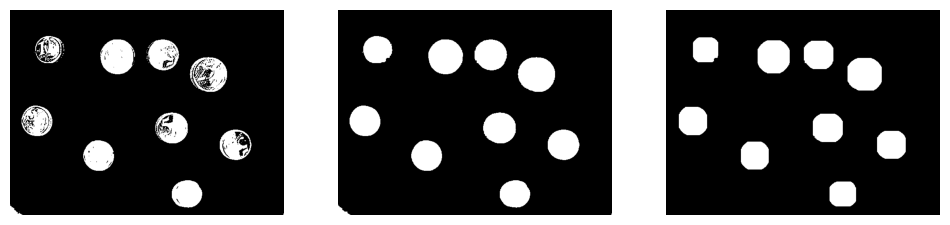

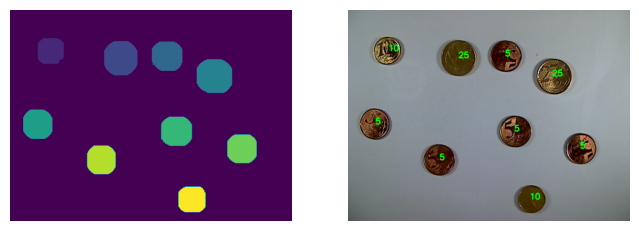

Imagem 95.jpg
Número de moedas 9
[3115, 4997, 4015, 5335, 3845, 4114, 3897, 3767, 3285]
Valor total: 95



In [13]:
for i, file in enumerate(list_files):
  img = mpimg.imread(path_moedas+file).astype('uint8')
  img_gray = np.uint8(0.3*img[:,:,0]+0.59*img[:,:,1]+0.11*img[:,:,2])

  seg_img = seg_and_postprocessing(img_gray, 15, 31)
  output = cv2.connectedComponentsWithStats(seg_img, 4)

  plt.figure(figsize=(8,4))
  plt.subplot(1,2,1)
  plt.imshow(output[1])
  plt.axis('off')

  list_npixels = calc_npixels_label(output[1], output[0])

  soma = 0
  for n, p in enumerate(list_npixels):
    x = int(output[3][n+1][0])
    y = int(output[3][n+1][1])

    if p < 3500:
      soma += 10
      cv2.putText(img, '10', (x, y), cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0, 255, 0), 2)
    elif p > 4600:
      soma += 25
      cv2.putText(img, '25', (x, y), cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0, 255, 0), 2)
    else:
      soma += 5
      cv2.putText(img, '5', (x, y), cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0, 255, 0), 2)

  plt.subplot(1,2,2)
  plt.imshow(img)
  plt.axis('off')
  plt.show()

  print('Imagem', file)
  print('Número de moedas', len(list_npixels))
  print(list_npixels)
  print('Valor total:', soma)
  print()

### Exercício 3.1

Utilizando como base os códigos apresentados anteriormente, crie um novo Notebook que seja uma demonstração (demo) de como obter o valor total de um conjunto de moedas em uma imagem. O Notebook deve conter uma breve descrição do problema e deve explicar passo a passo as etapas e códigos utilizados para chegar ao resultado final. Tente descrever e exemplificar cada etapa, indicando qual o seu objetivo, explicando os processamentos aplicados, as funções utilizadas e os parâmetros escolhidos. Ao final do Notebook, apresente links para referências úteis no aprofundamento dos tópicos abordados. Você também pode linkar referências interessantes ao longo do Notebook, à medida que apresenta as etapas e os conceitos relacionados.

Não se esqueça de enviar o Notebook da demo juntamente com a entrega deste Notebook!